In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df_train = pd.read_csv("Xy_train.csv")
print(df_train.shape)

(100, 2)


In [4]:
x = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values
print(x.shape,y.shape)

(100, 1) (100,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [6]:
# Definimos el escalador 
scaler = StandardScaler() # Pueden probar con otros
# Fiteamos para los x_train
scaler = scaler.fit(x_train)

In [7]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Gs y predicción

In [8]:
est = SVR(max_iter=25000)
n_folds = 5
parameters = {'C' : [1,10,100],
             'gamma':[0.1,0.2,0.5],
             'kernel':['rbf', 'linear','poly']}
# Definimos el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [9]:
gs.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 135 out of 135 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=25000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=3,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.2, 0.5],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [10]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.2,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 100, 'gamma': 0.2, 'kernel': 'rbf'} 

-0.6119001192913643 



In [11]:
pred_linear = gs.best_estimator_
svr_prediction = pred_linear.predict(x_test_scaled)

In [12]:
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)

In [13]:
svr_mse

0.9490001040602335

In [14]:
resultados = pd.DataFrame(columns = ['Modelo','Features','MSE'])

In [15]:
resultados

,Modelo,Features,MSE


In [16]:
resultados.append([{'Modelo':'SVR','Features':'Linear','MSE':svr_mse}],ignore_index=True)


,Modelo,Features,MSE
0,SVR,Linear,0.949


MSE: 0.949000


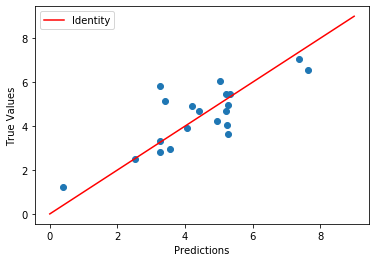

In [17]:
#Vamos a plotear Predictions vs True values
plt.scatter(svr_prediction, y_test)
plt.plot(np.arange(0,10),np.arange(0,10), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()

print(f'MSE: {svr_mse:.6f}')

# Predicciones


In [18]:
test = pd.read_csv('X_test.csv')

In [19]:
svr_prediction = pred_linear.predict(test)

In [21]:
svr_prediction.round(2)

array([ 8.35,  8.04,  6.68, 18.04, 21.15,  7.58,  6.69,  4.05,  6.67,
       20.89, 23.54,  7.82,  6.67,  3.27, 16.2 ,  6.71, 14.14,  8.79,
        6.98,  8.09])